# Analysis Project: Picogreen Ratio >400/Total vs. User

In [1]:
#Import necessary functions
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
#ps = patch_seq csv file
ps = pd.read_csv("patch_seq_log_mouse.csv")

In [3]:
#list_initial = list with specific columns used from csv file
list_initial = ["Date", "User", "Rig #", "Ratio >400/total", "PCR cycles", "SM_QC_PF", "Bad dates"]
ps = ps[list_initial]
ps.head()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF,Bad dates
0,170104,P1,5,0.45,18.0,pass,x
1,170104,P1,5,0.9,18.0,pass,x
2,170104,P1,5,0.78,18.0,pass,x
3,170104,P1,5,0.68,18.0,pass,x
4,170104,P1,5,0.7,18.0,pass,x


### Categorizing & Filtering the columns

In [4]:
#Changing Date Format
ps["Date"] = pd.to_datetime(ps["Date"], format = "%y%m%d", errors = "coerce")

#Changing String to Numerical
ps["Ratio >400/total"] = pd.to_numeric(ps["Ratio >400/total"].str.replace(' ',''), errors ='coerce')

#Categories
ps["User"] = ps["User"].astype("category")
ps["Rig #"] = ps["Rig #"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

#Filtering Columns
ps = ps[ps["PCR cycles"] == 21]      #Shows 21 pcr cycles
ps = ps[ps["SM_QC_PF"] != "cnt"]     #Shows everything except (cnt = control)
ps = ps[ps["Bad dates"] != "x"]      #Shows everthing except (x = contaminated)

#Dropping blank columns
ps = ps.drop("Bad dates", 1)
ps.dropna(subset = ["User", "Ratio >400/total", "SM_QC_PF"], inplace = True)
ps.head()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
1634,2017-04-19,P2,6,0.41,21.0,fail
1635,2017-04-19,P2,6,0.54,21.0,pass
1636,2017-04-19,P2,6,1.00,21.0,fail
1637,2017-04-19,P2,6,0.71,21.0,pass
1638,2017-04-19,P2,6,0.55,21.0,pass


In [5]:
ps.tail()

,Date,User,Rig #,Ratio >400/total,PCR cycles,SM_QC_PF
3798,2017-09-01,P8,6,0.28,21.0,pass
3799,2017-09-01,P8,6,0.71,21.0,pass
3800,2017-09-01,P8,6,0.34,21.0,pass
3801,2017-09-01,P8,6,0.37,21.0,pass
3802,2017-09-01,P8,6,0.44,21.0,pass


## Info

In [6]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412 entries, 1634 to 3802
Data columns (total 6 columns):
Date                1412 non-null datetime64[ns]
User                1412 non-null category
Rig #               1412 non-null category
Ratio >400/total    1412 non-null float64
PCR cycles          1412 non-null category
SM_QC_PF            1412 non-null category
dtypes: category(4), datetime64[ns](1), float64(1)
memory usage: 39.7 KB


In [7]:
ps.User.value_counts()

P1     546
P2     465
P8     310
P6      78
P5      13
PB       0
PA       0
P9       0
P6       0
P3       0
P0       0
Name: User, dtype: int64

## Swarmplot, Violinplot & Boxplot of Picogreen Ratio >400/Total vs User

Users = P1(Kristen), P2(Rusty), P8(Lindsay), P9(Lisa), PA(Ram), PB(Dijon)

Data: 4/19/17-Present(2018)

Issue for plotting, values for ratio are displayed differently such as 33% or 0.33. From date 9/06/17 and later they were displayed as percentage and not ratios. P1,P2,P8 have data from 4/19 to 9/06/17 in ratios then everyone's results are in percentages

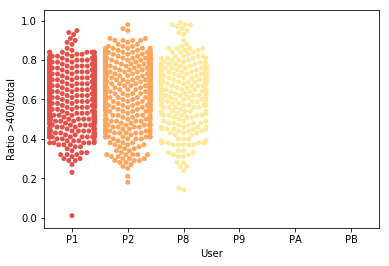

In [8]:
sp = sns.swarmplot(x = "User", y = "Ratio >400/total", data = ps[ps["Ratio >400/total"] < 1], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

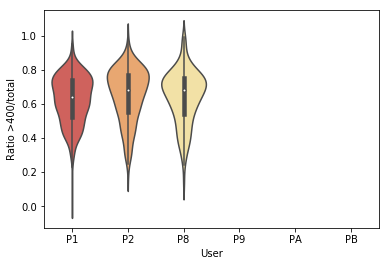

In [9]:
vp = sns.violinplot(x = "User", y = "Ratio >400/total", data = ps[ps["Ratio >400/total"] < 1], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")

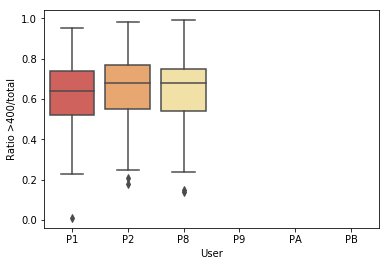

In [10]:
np = sns.boxplot(x = "User", y = "Ratio >400/total", data = ps[ps["Ratio >400/total"] < 1], 
                    order = ["P1", "P2", "P8", "P9", "PA", "PB"], palette = "Spectral")